In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from test_ssurjano_bench import *


# myRfuncs = ("branin", "hart3", "hart6", "shekel", "ackley", "levy", "powell")

myRfuncs = ("branin","hart3","hart6","shekel","ackley")
algorithms = ("SRS","DYCORS","CPTVl")

# myRfuncs = ("branin","hart3","hart6","shekel")
# algorithms = ("SRS","DYCORS","MLSL","CPTVl")

myNargs = {}
maxEvals = {}
nTrials = 0
rtol = 0
optres = {}

In [4]:
for a in algorithms:
    optres[a] = {}
    for rFunc in myRfuncs:
        myNargs[rFunc] = 0
        maxEvals[rFunc] = 0
        optres[a][rFunc] = []
        with open("ssurjano_bench_plot_" + rFunc + "_" + a + ".pkl", "rb") as f:
            myNargs[rFunc], maxEvals[rFunc], nTrials, optres[a][rFunc] = pickle.load(f)

In [5]:
# func = "shekel"
# print([optres["CPTVl"][func][i].x for i in range(nTrials)])
# print([optres["CPTVl"][func][i].fx for i in range(nTrials)])

# print([np.minimum.accumulate(optres["CPTVl"][func][i].fsamples).tolist() for i in range(nTrials)])
# print(np.array([np.minimum.accumulate(optres["CPTVl"][func][i].fsamples).tolist() for i in range(nTrials)]))

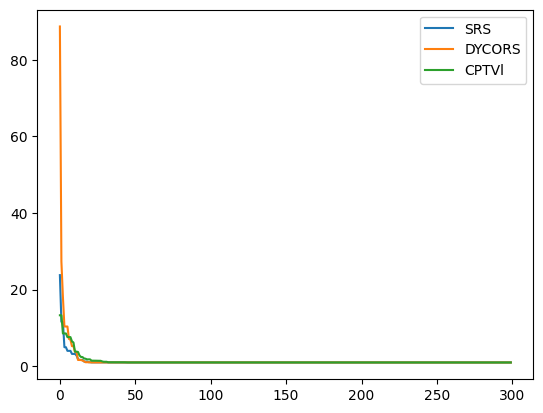

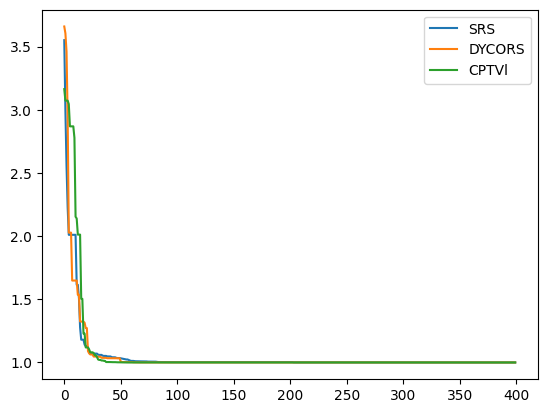

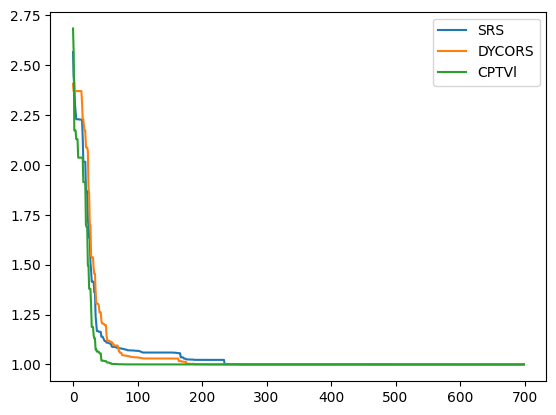

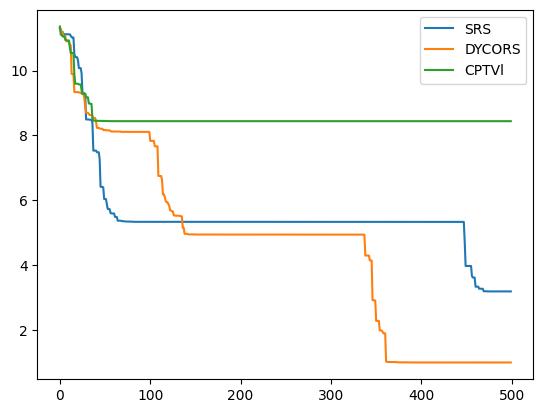

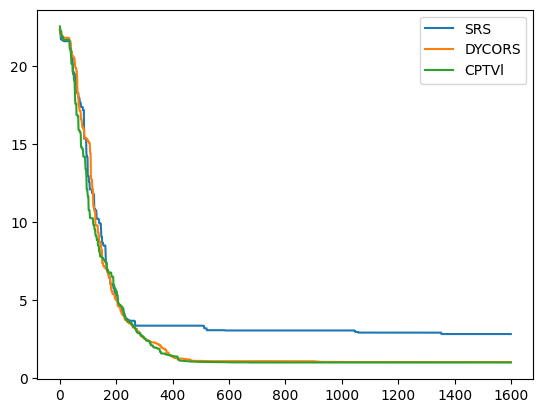

In [6]:
avgBestVals = {}
for a in algorithms:
    avgBestVals[a] = {}
    for rFunc in myRfuncs:
        avgBestVals[a][rFunc] = np.mean(np.array([np.minimum.accumulate(optres[a][rFunc][i].fsamples).tolist() for i in range(nTrials)]), axis=0)

for rFunc in myRfuncs:
    for a in algorithms:
        plt.plot(avgBestVals[a][rFunc], label=a)
    plt.legend()
    plt.show()

In [7]:
rtau = 1e-2
atau = 1e-3
minVal = 1.0

lpa = {}
for a in algorithms:
    lpa[a] = {}
    for rFunc in myRfuncs:
        count = 0
        while count < len(avgBestVals[a][rFunc]):
            if avgBestVals[a][rFunc][count] - minVal <= rtau * abs(minVal):
                break
            else:
                count += 1
        lpa[a][rFunc] = count+1

maxKappa = 100
delta = {}
for a in algorithms:
    delta[a] = np.zeros(maxKappa+1)
    for k in range(1,maxKappa+1):
        count = 0
        for rFunc in myRfuncs:
            if lpa[a][rFunc]/(myNargs[rFunc]+1) <= k:
                count += 1
        delta[a][k] = count / len(myRfuncs)

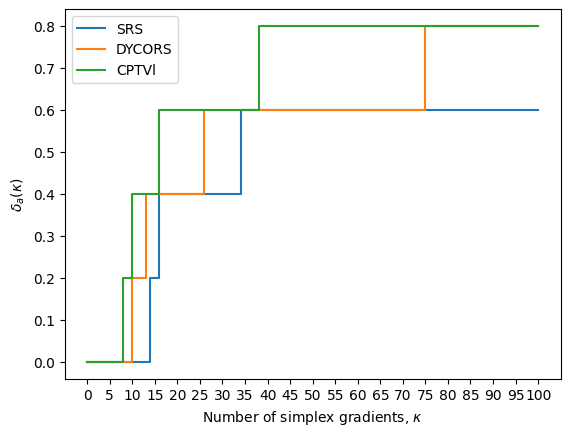

In [8]:
for a in algorithms:
    plt.step(np.arange(0,maxKappa+1), delta[a], where='post', label=a)
plt.xlabel(r'Number of simplex gradients, $\kappa$')
plt.xticks(range(0,101,5))
plt.ylabel(r'$\delta_a(\kappa)$')
plt.legend()
plt.show()

In [9]:
# avgBestVals["SRS"]["ackley"]
lpa["SRS"]["ackley"]/(myNargs["ackley"]+1)

100.0625